In [2]:
import folium
import pandas as pd
import geojson

## `folium` examples

This notebook is a few cursory examples of how to use folium to visualize data on a map. We focus on simple examples.

You can find lots more in [Filipe's github site](https://github.com/ocefpaf/folium_notebooks)

In [3]:
# !wget https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
# !wget https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/US_Unemployment_Oct2012.csv

In [4]:
# Note location is in latitude, longitude.
# tiles 'staben toner' is a nice B&W background

# m = folium.Map()
# m = folium.Map(location=(29, -89))
# m = folium.Map(location=(30, -98), tiles='Stamen Toner')
m = folium.Map(location=(30, -98), tiles='Stamen Toner', zoom_start=6)
# m = folium.Map(location=(46.86, -121.74), tiles='Stamen Terrain', zoom_start=12)
m

In [5]:
with open('us-states.json') as f:
    states = geojson.loads(f.read())

In [6]:
type(states)

geojson.feature.FeatureCollection

In [7]:
states.features[15].id

'KS'

In [8]:
[feature.id for feature in states.features]

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [9]:
# states_choropleth = folium.Choropleth(geo_data='us-states.json')     ### read straight from a file,
states_choropleth = folium.Choropleth(geo_data=states)                 ### or a geojson object
m.add_child(states_choropleth)
m

In [10]:
state_data = pd.read_csv('US_Unemployment_Oct2012.csv')
state_data

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8


In [16]:
m = folium.Map(location=(30, -98), tiles='Stamen Toner', zoom_start=6)

states_unemployment = folium.Choropleth(
     geo_data=states,
     name='choropleth',
     data=state_data,
     columns=['State', 'Unemployment'],
     key_on='feature.id',   # this line links the csv unemployment data with the state shapes
     fill_color='YlGn',
     fill_opacity=0.7,
     line_opacity=0.2,
     legend_name='Unemployment Rate (%)'
).add_to(m)

m

In [21]:
# TAMU -> 30.6188° N, 96.3365° W
tamu = geojson.Point((-97.3365, 30.6188))
tamu

{"coordinates": [[-97.3365, 30.6188], [-97.3365, 31.6188]], "type": "Point"}

In [22]:
folium.GeoJson(tamu).add_to(m)
m

In [23]:
m = folium.Map(location=(30, -98), tiles='Stamen Toner', zoom_start=6)

# Note, lat/lon reversed from geojson definition
tamu_marker = folium.Marker((30.6188, -96.3365),
                            popup='TAMU', icon=folium.Icon(color='darkred'))
m.add_child(tamu_marker)
m

In [25]:
m = folium.Map(location=(30, -98), tiles='Stamen Toner', zoom_start=6)

locations = [(30, -98),
             (31, -98),
             (30, -97),
             (31, -97)]

Nshape = folium.PolyLine(locations=locations, color='blue', weight=2, opacity=0.5)
m.add_child(Nshape)
m

In [31]:
m = folium.Map(location=(30, -98), tiles='Stamen Toner', zoom_start=6)

locations = [(30, -98),
             (31, -98),
             (31, -97),
             (30, -97)]

box = folium.Polygon(locations=locations, color='red', weight=3, opacity=1, fill=True,
                      fill_color='blue', fill_opacity=0.5, popup='foo')    # also try these options.
m.add_child(box)
m

In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import mplleaflet

In [33]:
ds = xr.open_dataset('http://barataria.tamu.edu:8080/thredds/dodsC/forecast_latest/txla2_his_a_latest.nc')
zeta = ds.zeta[0].values
lon = ds.lon_rho.values
lat = ds.lat_rho.values

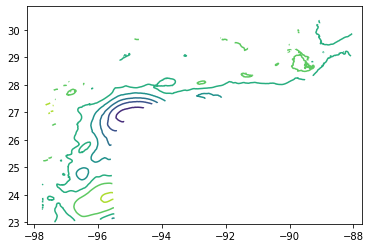

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contour(lon, lat, zeta)

In [35]:
ssh_gj = mplleaflet.fig_to_geojson(fig=fig)

In [45]:
m = folium.Map(location=(30, -98), tiles='Stamen Toner', zoom_start=6)

folium.features.GeoJson(ssh_gj).add_to(m)
m